# **DEVELOPING A PREDICTIVE MODEL FOR TRAFFIC CRASH CAUSE PREDICTION**

---

## **1. Business Understanding**

### 1.1 Business Overview
Traffic crashes remain a significant public safety challenge, causing numerous fatalities, injuries, and economic losses annually. While vast amounts of data on traffic accidents are collected by authorities, there is a gap in tools that not only predict traffic crash outcomes but also explain the underlying causes. This project aims to leverage machine learning techniques to predict the primary contributory cause of traffic crashes based on vehicle characteristics, roadway conditions, and environmental factors.

By using both interpretable (white-box) and complex (black-box) machine learning models, this project balances predictive performance with transparency. The insights generated will help transportation authorities, safety organizations, and urban planners to prioritize interventions, improve road safety policies, and allocate resources effectively to reduce traffic-related incidents.

---

### 1.2 Problem Statement
Transportation agencies typically rely on manual reporting and descriptive statistics to understand the causes of traffic crashes. However, these methods often fail to capture the complex interactions among various factors such as driver behavior, vehicle characteristics, and environmental conditions. This limitation hinders the ability to design effective safety interventions and policies.

This project seeks to bridge this gap by developing machine learning models capable of predicting traffic crash causes with high accuracy while maintaining interpretability. By comparing both white-box and black-box models, the project will provide transparent and actionable insights that can be used to guide traffic safety measures, infrastructure development, and policy decision-making.

---

### 1.3 Business Objective

#### 1.3.1 Main Objective
To develop a machine learning model that can accurately predict the primary contributory cause of traffic crashes while ensuring that the model’s predictions are interpretable for decision-makers.

#### 1.3.2 Specific Objectives
The specific objectives of the project are:

1. **Predict the Primary Crash Causes:**  
   Develop and evaluate supervised machine learning models to classify traffic crashes based on their primary contributory causes.

2. **Ensure Model Interpretability:**  
   Apply interpretable modeling techniques to provide transparent insights into the factors driving the model’s predictions.

3. **Identify Key Risk Factors:**  
   Analyze and identify the most significant risk factors associated with traffic crashes, including vehicle, roadway, and environmental features.

4. **Evaluate Performance vs. Interpretability:**  
   Compare white-box and black-box models to evaluate the trade-offs between model accuracy and interpretability.

5. **Support Safety Interventions:**  
   Provide actionable insights that can inform traffic safety policies, infrastructure design, and targeted enforcement strategies.

---

### 1.4 Research Questions

1. What features are most predictive of traffic crash causes based on vehicle, roadway, and environmental factors?
2. How can machine learning models be used to predict the primary contributory cause of a traffic crash?
3. What are the trade-offs between predictive accuracy and model interpretability in predicting crash causes?
4. How can white-box models (e.g., Decision Trees) and black-box models (e.g., XGBoost) be compared to assess model performance and explainability?
5. What are the key risk factors influencing traffic crashes, and how can they inform safety interventions?
6. How can machine learning models be applied to predict crash causes across different locations and time periods?

---

### 1.5 Success Criteria

The success of this project will be assessed based on the following criteria:

1. **Predictive Performance:**  
   Achieve a **macro F1 score** of at least **0.50**, demonstrating the model’s ability to predict all traffic crash causes with balanced performance across all categories.

2. **Model Interpretability:**  
   Ensure that the model’s predictions can be easily explained using interpretability techniques, such as feature importance, making the results understandable to non-technical stakeholders.

3. **Actionable Insights:**  
   Provide actionable insights from the model’s findings, identifying key risk factors associated with different traffic crash causes, and suggesting data-driven safety interventions.

4. **Trade-off Evaluation:**  
   Compare the performance of white-box and black-box models and evaluate the trade-offs between **predictive accuracy** and **interpretability**, ensuring that the chosen model balances both aspects effectively.

## **2. Data Understanding and Key Stakeholders**

### **2.1 Data Understanding**

This project uses the Traffic Crashes dataset provided by the City of Chicago, which contains detailed records of traffic crash events reported by the Chicago Police Department. Each row in the dataset represents a unique traffic crash event, with multiple features capturing information about the vehicles, individuals involved, roadway conditions, traffic controls, and environmental conditions at the time of the crash.

The target variable for this analysis is the **Primary Contributory Cause** of the crash, which represents the main factor identified as contributing to the incident. This is crucial for predicting and understanding the primary causes of crashes and informing traffic safety interventions.

---
### **2.2 Dataset Description**

 - Records: 1,024,029 traffic crash events

 - Columns: 48 features, including categorical, numerical, and temporal data

 - Target variable: PRIM_CONTRIBUTORY_CAUSE (primary cause of crash)

 - Categorical features:(e.g., weather, lighting, traffic control, crash type)

 - Numerical features:(e.g., speed limit, number of units, injury counts, crash hour/day/month)

 - Geographic info: Latitude, longitude, and location for spatial analysis

 ---

### **2.3 Key Features:**

Here are some of the key features used to predict the crash causes:

| **Feature Name**            | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| **posted_speed_limit**       | The speed limit posted on the roadway at the time of the crash                   |
| **traffic_control_device**   | Type of traffic control device (e.g., stop sign, traffic signal, no control)    |
| **device_condition**         | The condition of the traffic control device (e.g., functioning properly)        |
| **weather_condition**        | Weather conditions at the time of the crash (e.g., clear, rain, snow)           |
| **lighting_condition**       | The lighting condition during the crash (e.g., daylight, darkness)              |
| **first_crash_type**         | Type of crash (e.g., rear-end, side-impact)                                     |
| **roadway_surface_cond**     | Condition of the roadway surface (e.g., dry, wet, icy)                         |

These features are used to train machine learning models that predict the **Primary Contributory Cause** of traffic crashes. Understanding these factors helps in identifying key patterns and risk factors associated with crashes.

---

### **2.4 Key Stakeholders**

1. **Transportation Authorities:**  
   Key stakeholders like the **Department of Transportation** can use the insights from this project to prioritize interventions, develop road safety strategies, and improve infrastructure. By identifying the primary contributory causes, they can allocate resources to areas with the highest risk of accidents.

2. **Vehicle Safety Boards and Organizations:**  
   Organizations focused on **vehicle safety**, such as the **National Highway Traffic Safety Administration (NHTSA)** or local safety boards, will benefit from the findings. They can use the model insights to influence policies around vehicle design, safety features, and driver education programs.

3. **City Authorities and Urban Planners:**  
   **City officials** and **urban planners** can utilize this data to design safer roads and intersections. By understanding environmental and roadway conditions that contribute to crashes, they can implement targeted safety measures, such as improved signage, traffic signals, or road maintenance.

---


## **3. Data Preparation**
### 3.1 Importing libraries
The necessary python libraries for data cleaning, visualizations and modeling are imported. These include pandas, Numpy, Scikit-learn and many others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

### 3.2 Data loading and Inspection
In this section the Traffic Crashes dataset is loaded from a CSV file ito a pandas DataFrame. Basic inspection functions are applied to confirm successful loading and preview the structure of the dataset before further analysis.

In [2]:
# Loading the dataset
df = pd.read_csv("Traffic_Crashes.csv")
# display first five rows.
df.head()

c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,e268f2eeda8ac7b5a4c2a1df4fd2ce3754bde4e92bfbfc...,NaN,01/29/2026 10:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,...,0.0,0.0,3.0,0.0,22,5,1,41.878560,-87.636524,POINT (-87.636523872055 41.878560153624)
1,c157b0c950338c89f8de0f1c5de1fad8751cf2a5e4189a...,NaN,01/29/2026 10:10:00 PM,25,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,3.0,0.0,22,5,1,42.021287,-87.673023,POINT (-87.673023252655 42.021287350749)
2,9e6b31d4cd88bb220fa8ff4c0f92426f99ae64edbd8cd6...,NaN,01/29/2026 09:44:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,21,5,1,41.953595,-87.741477,POINT (-87.741477234719 41.953595431054)
3,d5656bd91be03c1848369fb76427a0d6b05c5e300b665c...,NaN,01/29/2026 09:40:00 PM,20,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,...,0.0,0.0,2.0,0.0,21,5,1,41.874687,-87.764510,POINT (-87.764510374021 41.874686639254)
4,764fd30db9bef388872f692ded03776c1b58fe96584ece...,NaN,01/29/2026 09:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,21,5,1,41.874401,-87.725592,POINT (-87.725592011617 41.874401315544)


In [3]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [4]:
# Checking the structure of our target variable
df['PRIM_CONTRIBUTORY_CAUSE']

0                    FOLLOWING TOO CLOSELY
1          DRIVING ON WRONG SIDE/WRONG WAY
2                      UNABLE TO DETERMINE
3               IMPROPER TURNING/NO SIGNAL
4                      UNABLE TO DETERMINE
                        ...               
1024387                UNABLE TO DETERMINE
1024388      FAILING TO YIELD RIGHT-OF-WAY
1024389                UNABLE TO DETERMINE
1024390                UNABLE TO DETERMINE
1024391                IMPROPER LANE USAGE
Name: PRIM_CONTRIBUTORY_CAUSE, Length: 1024392, dtype: object

### 3.3 Data cleaning

In [5]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024392 entries, 0 to 1024391
Data columns (total 48 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1024392 non-null  object 
 1   CRASH_DATE_EST_I               74336 non-null    object 
 2   CRASH_DATE                     1024392 non-null  object 
 3   POSTED_SPEED_LIMIT             1024392 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         1024392 non-null  object 
 5   DEVICE_CONDITION               1024392 non-null  object 
 6   WEATHER_CONDITION              1024392 non-null  object 
 7   LIGHTING_CONDITION             1024392 non-null  object 
 8   FIRST_CRASH_TYPE               1024392 non-null  object 
 9   TRAFFICWAY_TYPE                1024392 non-null  object 
 10  LANE_CNT                       199035 non-null   object 
 11  ALIGNMENT                      1024392 non-null  object 
 12  ROADWAY_SURFAC

In [6]:
# Checking for the shape of the dataset
df.shape

(1024392, 48)

In [7]:
# Checking for null values
df.isna().sum()

CRASH_RECORD_ID                        0
CRASH_DATE_EST_I                  950056
CRASH_DATE                             0
POSTED_SPEED_LIMIT                     0
TRAFFIC_CONTROL_DEVICE                 0
DEVICE_CONDITION                       0
WEATHER_CONDITION                      0
LIGHTING_CONDITION                     0
FIRST_CRASH_TYPE                       0
TRAFFICWAY_TYPE                        0
LANE_CNT                          825357
ALIGNMENT                              0
ROADWAY_SURFACE_COND                   0
ROAD_DEFECT                            0
REPORT_TYPE                        34035
CRASH_TYPE                             0
INTERSECTION_RELATED_I            788854
NOT_RIGHT_OF_WAY_I                978500
HIT_AND_RUN_I                     703024
DAMAGE                                 0
DATE_POLICE_NOTIFIED                   0
PRIM_CONTRIBUTORY_CAUSE                0
SEC_CONTRIBUTORY_CAUSE                 0
STREET_NO                              0
STREET_DIRECTION

Most critical columns like PRIM_CONTRIBUTORY_CAUSE, CRASH_DATE, and POSTED_SPEED_LIMIT have no missing values.

Some optional or situational columns have high number of missing values, including CRASH_DATE_EST_I, LANE_CNT, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, WORK_ZONE_I, and PHOTOS_TAKEN_I.

A few columns have low number of missing values, such as STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, and injury-related fields.

This can be resolved by either dropping or imputing missing values


In [8]:
# Checking the percentage of missing values.
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

WORKERS_PRESENT_I                99.861674
DOORING_I                        99.681567
WORK_ZONE_TYPE                   99.586975
WORK_ZONE_I                      99.458410
PHOTOS_TAKEN_I                   98.572812
STATEMENTS_TAKEN_I               97.610290
NOT_RIGHT_OF_WAY_I               95.520074
CRASH_DATE_EST_I                 92.743403
LANE_CNT                         80.570426
INTERSECTION_RELATED_I           77.007044
HIT_AND_RUN_I                    68.628416
REPORT_TYPE                       3.322459
LOCATION                          0.760256
LATITUDE                          0.760256
LONGITUDE                         0.760256
MOST_SEVERE_INJURY                0.217788
INJURIES_UNKNOWN                  0.216421
INJURIES_INCAPACITATING           0.216421
INJURIES_NON_INCAPACITATING       0.216421
INJURIES_NO_INDICATION            0.216421
INJURIES_REPORTED_NOT_EVIDENT     0.216421
INJURIES_TOTAL                    0.216421
INJURIES_FATAL                    0.216421
BEAT_OF_OCC

In [9]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [10]:
# Checking  for duplicates
df.duplicated().value_counts()

False    1024392
dtype: int64

In [11]:
#Dropping duplicates
df = df.drop_duplicates(keep="first")
df.duplicated().value_counts()

False    1024392
dtype: int64

Here we resulted to dropping the columns with a huge number of missing values since the percentages were more than 30%

In [12]:
# Dropping unnecessary columns 
df = df.drop(
    columns=[
        'CRASH_RECORD_ID',
        'HIT_AND_RUN_I',
        'NOT_RIGHT_OF_WAY_I',
        'LANE_CNT',
        'INTERSECTION_RELATED_I',
        'CRASH_DATE_EST_I',
        'PHOTOS_TAKEN_I',
        'STATEMENTS_TAKEN_I',
        'DOORING_I',
        'WORK_ZONE_I',
        'WORK_ZONE_TYPE',
        'WORKERS_PRESENT_I',
        'LATITUDE',
        'LONGITUDE',
        'CRASH_DATE'
    ], errors='ignore'
) 
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,3.0,0.0,22,5,1,POINT (-87.636523872055 41.878560153624)
1,25,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,0.0,0.0,0.0,0.0,3.0,0.0,22,5,1,POINT (-87.673023252655 42.021287350749)
2,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,0.0,0.0,0.0,0.0,2.0,0.0,21,5,1,POINT (-87.741477234719 41.953595431054)
3,20,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,0.0,0.0,0.0,0.0,2.0,0.0,21,5,1,POINT (-87.764510374021 41.874686639254)
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,0.0,0.0,0.0,0.0,3.0,0.0,21,5,1,POINT (-87.725592011617 41.874401315544)


In [13]:
# Confirming the percentage of missing values in remaining columns 
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

REPORT_TYPE                      3.322459
LOCATION                         0.760256
MOST_SEVERE_INJURY               0.217788
INJURIES_NO_INDICATION           0.216421
INJURIES_REPORTED_NOT_EVIDENT    0.216421
INJURIES_NON_INCAPACITATING      0.216421
INJURIES_INCAPACITATING          0.216421
INJURIES_FATAL                   0.216421
INJURIES_TOTAL                   0.216421
INJURIES_UNKNOWN                 0.216421
BEAT_OF_OCCURRENCE               0.000488
STREET_DIRECTION                 0.000390
STREET_NAME                      0.000098
DEVICE_CONDITION                 0.000000
TRAFFICWAY_TYPE                  0.000000
ROADWAY_SURFACE_COND             0.000000
ALIGNMENT                        0.000000
WEATHER_CONDITION                0.000000
FIRST_CRASH_TYPE                 0.000000
LIGHTING_CONDITION               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
ROAD_DEFECT                      0.000000
STREET_NO                        0.000000
CRASH_TYPE                       0

In [14]:
# Checking the shape of our cleaned dataset
df.shape

(1024392, 33)

Using mode and median to fill null values for categorical and numerical columns

In [15]:
# Using mode to fill categorical columns
cat_cols = df.select_dtypes(include='object').columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [16]:
# Using median to fill numerical columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

df[num_cols] = df[num_cols].fillna(
    df[num_cols].median()
)

In [17]:
# Using isna to confirm we have dealt with all missing values
df.isna().sum()

POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN    

In [18]:
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

LOCATION                         0.0
SEC_CONTRIBUTORY_CAUSE           0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ALIGNMENT                        0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
REPORT_TYPE                      0.0
CRASH_TYPE                       0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
STREET_NO                        0.0
CRASH_MONTH                      0.0
STREET_DIRECTION                 0.0
STREET_NAME                      0.0
BEAT_OF_OCCURRENCE               0.0
NUM_UNITS                        0.0
MOST_SEVERE_INJURY               0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
INJURIES_NON_INCAPACITATING      0.0
I

In [19]:
# Stripping whitespaces and changing column names to lower case
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'location'],
      dtype='object')

## 3.3 Target Variable Engineering: Crash Cause

The original `prim_contributory_cause` column contained many very specific crash causes. While this level of detail is useful, it created a large number of categories, which made the dataset highly imbalanced and difficult for our machine learning models to learn effectively.

To address this, we grouped the original crash causes into broader, more meaningful categories. This allowed us to reduce noise in the target variable, simplify the classification task, and improve interpretability of the model outputs.

### *Crash Cause Grouping*

We grouped the crash causes into the following categories:

- **Driver Error**: Causes related to driver behavior or decision-making, such as failing to yield, following too closely, or disregarding traffic signals.
- **Non-Driver Technical**: Causes related to external or technical factors, including weather conditions, road defects, or vehicle equipment issues.
- **Other**: Causes that did not clearly fit into the main categories.

The value **"UNABLE TO DETERMINE"** was treated as missing data because it does not provide meaningful information about the actual cause of a crash. We removed these rows to avoid introducing uncertainty into the modeling process.

After creating the new `Crash_Cause` column, we dropped the original `prim_contributory_cause` column and used the engineered variable as the target for our classification models.

### *Class Distribution After Grouping*

After grouping the crash causes, the class distribution became more balanced and manageable. This helped our models focus on learning meaningful patterns instead of being dominated by rare or overly specific categories.

By reducing extreme class imbalance and simplifying the target variable, we also minimized the risk of unstable learning behavior in our pipelines, such as the model overfitting to very small classes. This resulted in a more reliable and interpretable modeling process.

In [20]:
cause_mapping = {
    # Treating undetermined as missing so we can drop those rows
    'UNABLE TO DETERMINE': np.nan,

    # Driver Error
    'FAILED TO REDUCE SPEED TO AVOID CRASH': 'Driver Error',
    'IMPROPER OVERTAKING/PASSING': 'Driver Error',
    'FOLLOWING TOO CLOSELY': 'Driver Error',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Driver Error',
    'DISREGARDING TRAFFIC SIGNALS': 'Driver Error',
    'DISREGARDING STOP SIGN': 'Driver Error',
    'IMPROPER LANE USAGE': 'Driver Error',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Error',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Error',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Driver Error',
    'IMPROPER BACKING': 'Driver Error',
    'DISTRACTION - FROM INSIDE VEHICLE': 'Driver Error',

    # Non-Driver Technical (merge External + Vehicle Defect)
    'WEATHER': 'Non-Driver Technical',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Non-Driver Technical',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Non-Driver Technical',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Non-Driver Technical',
    'EQUIPMENT - VEHICLE CONDITION': 'Non-Driver Technical',

    # Other
    'OTHER': 'Other'
}
df['Crash_Cause'] = df['prim_contributory_cause'].map(cause_mapping)

# Converting unmapped known causes to 'Other' FIRST
df['Crash_Cause'] = df['Crash_Cause'].fillna('Other')

# Dropping only the undetermined ones (which we set to NaN explicitly)
df = df[df['prim_contributory_cause'] != 'UNABLE TO DETERMINE']

# Dropping original
df = df.drop(columns=['prim_contributory_cause'])

df['Crash_Cause'].value_counts()

Driver Error            447960
Other                   139591
Non-Driver Technical     33714
Name: Crash_Cause, dtype: int64

We can now see our different causes catergories and how they are distributed in the dataset

In [21]:
#Additional columns to drop 
columns_to_drop = ['date_police_notified', 'street_name', 'location', 'sec_contributory_cause', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown']
df = df.drop(columns=columns_to_drop)

In [22]:
# Saving the changes made during cleaning
df.to_csv("clean_traffic_crashes.csv", index=False)


In [23]:
#Loading the cleaned dataset
df_clean = pd.read_csv("clean_traffic_crashes.csv")
df_clean.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,crash_type,damage,street_no,street_direction,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,crash_month,Crash_Cause
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INJURY / DRIVE AWAY,"OVER $1,500",233,S,122.0,2,22,5,1,Driver Error
1,25,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,NO INJURY / DRIVE AWAY,$500 OR LESS,1658,W,2422.0,2,22,5,1,Other
2,20,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",401,S,1522.0,2,21,5,1,Driver Error
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INJURY / DRIVE AWAY,"OVER $1,500",3150,W,824.0,2,20,5,1,Driver Error
4,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",8600,W,1614.0,2,20,5,1,Other


In [24]:
df_clean.columns

Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'damage', 'street_no', 'street_direction',
       'beat_of_occurrence', 'num_units', 'crash_hour', 'crash_day_of_week',
       'crash_month', 'Crash_Cause'],
      dtype='object')

## **4. Preprocessing**

## 4.1 Defining Features (X) and Target (Y)
Here we define our target and features variables to help us use Supervised machine learning methods for our white box models.

In [25]:
#Define X and Y
X = df_clean.drop(['Crash_Cause'], axis=1)
y = df_clean['Crash_Cause']

## 4.2 Train Test Split
Here we separate our dataset into two parts i.e the training and testing data set for modelling and prediction

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((465948, 20), (155317, 20))

In [27]:
# Checking X train
X_train.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,street_no,street_direction,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,crash_month
42965,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1300,S,1233.0,2,8,4,6
120869,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",6201,W,1633.0,2,3,1,3
126032,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",5200,W,1523.0,2,14,5,2
412343,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,$500 OR LESS,415,W,1821.0,2,17,5,8
284071,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2623,W,825.0,2,3,6,9


In [28]:
# checking X test
X_test.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,street_no,street_direction,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,crash_month
392310,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",1140,N,1531.0,2,19,7,11
526248,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",3115,N,2511.0,2,2,1,2
332020,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",1300,W,1231.0,2,6,6,11
177948,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",14,S,1125.0,2,13,5,5
331762,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",4400,W,2522.0,2,20,7,11


## 4.3 Preprocessing Pipelines 

In this step we prepare our data for modeling by normalizing features to prevent feature dominance and One Hot Encoding to covert catergorical variables to binary the computer can understand.We preprocess X train and X test separately to avoid data leakage.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score
)

from sklearn.inspection import permutation_importance

In [30]:
# Grouping rare categories → much fewer one-hot columns
rare_threshold = 200   

for col in ['street_name', 'first_crash_type', 'trafficway_type']:  
    if col in X_train.columns:
        counts = X_train[col].value_counts()
        common = counts[counts >= rare_threshold].index
        X_train[col] = X_train[col].where(X_train[col].isin(common), 'Rare/Other')
        X_test[col]  = X_test[col].where(X_test[col].isin(common), 'Rare/Other')
        print(f"Reduced {col}: {len(common)} common categories kept")

Reduced first_crash_type: 17 common categories kept
Reduced trafficway_type: 18 common categories kept


In [31]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns

In [32]:
# Drop very high categorical columns from OHE to save memory
high_card = ['LOCATION', 'STREET_NAME', 'DATE_POLICE_NOTIFIED']
cat_reduced = [c for c in categorical_features if c not in high_card]

preprocessor_light = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), cat_reduced),
        ('num', StandardScaler(), numeric_features)
    ]
)

In [33]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # handles missing values
    ("ohe", OneHotEncoder(handle_unknown="ignore")) # encoding categories
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

## **5. Modeling: White-Box and Black-Box Models**

With the preprocessing complete and the target variable encoded, the fully prepared training dataset was used to train and evaluate both white-box and black-box machine learning models. This dual-modeling approach allows for a balanced comparison between model interpretability and predictive performance.

### 5.1 White-Box Models

White-box models are inherently interpretable, meaning their decision-making processes can be easily understood and explained. These models are particularly valuable in domains where transparency and accountability are critical.

In this project, white-box models were trained to:

 - Understand the key factors contributing to traffic crash causes

 - Provide clear explanations for predictions

 - Establish a strong baseline for comparison

White-box models used include:

 - Logistic Regression

 - Decision Trees

These models enable direct interpretation of feature importance and decision logic, making them suitable for policy-making and safety analysis.

### 5.2 Black-Box Models

Black-box models prioritize predictive accuracy over interpretability. While they often achieve higher performance, their internal decision processes are more complex and less transparent.

In this project, black-box models were trained to:

 - Capture complex, non-linear relationships within the data

 - Improve prediction performance over simpler models

 - Serve as a benchmark for evaluating the trade-off between accuracy and explainability

Black-box models used include:

 - Random Forest

 - Gradient Boosting / XGBoost

Although these models are less interpretable by default, post-hoc explanation techniques can be applied to better understand their predictions.

## 5.3 Modeling Objective (Model Interpretability Focus)

The primary objective of the modeling stage is to balance predictive performance with interpretability. By training both white-box and black-box models, this project aims to understand not only what predictions are made, but why they are made.

Specifically, the modeling objectives are to:

 - Develop white-box models that provide transparent and easily interpretable decision rules, enabling clear identification of the factors that contribute to different crash causes.

 - Train black-box models to capture complex, non-linear relationships in the data and maximize predictive performance.

 - Compare the explanations produced by interpretable models with insights derived from black-box models using post-hoc interpretation techniques.

 - Evaluate the trade-offs between model accuracy and explainability to determine which models are most suitable for real-world decision-making.

 - Support actionable insights by identifying key features that influence crash outcomes in a way that can be communicated to both technical and non-technical stakeholders.

This approach ensures that model selection is guided not only by performance metrics but also by the ability to provide meaningful, trustworthy, and explainable insights.

## 5.4 Model Pipelines 

In [34]:
# Model Pipeline
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=50,class_weight='balanced_subsample', max_depth=15,max_features="sqrt",
                                     min_samples_leaf=5, random_state=42, n_jobs=-1,))
])

In [35]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        random_state=42 ))
])

In [36]:
def evaluate(name, pipe):
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    macro_f1 = f1_score(y_test, preds, average="macro")

    print("\n" + "="*70)
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1 : {macro_f1:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds, labels=pipe.classes_)
    ConfusionMatrixDisplay(cm, display_labels=pipe.classes_).plot(xticks_rotation=30)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return {"Model": name, "Accuracy": acc, "Macro_F1": macro_f1}

## 5.5 White-Box Models  

### 5.5.1 Logistic Regression

### *Baseline Logistic Regression*


Logistic Regression
Accuracy: 0.6083
Macro F1 : 0.4863

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.65      0.74    111991
Non-Driver Technical       0.20      0.59      0.30      8428
               Other       0.37      0.49      0.42     34898

            accuracy                           0.61    155317
           macro avg       0.48      0.57      0.49    155317
        weighted avg       0.71      0.61      0.64    155317



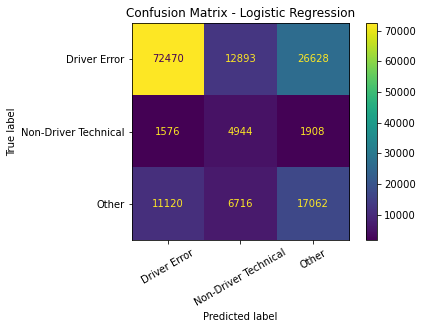

In [37]:
# Baseline logistic regression model 
results = []
result_logreg = evaluate("Logistic Regression", logreg_pipe)
results.append(result_logreg)

- **Accuracy:** 0.6083  
- **Macro F1:** 0.4863  
- **Evaluation:** Baseline model with regularization and balanced class weights. Although it provides a decent start, the model assumes a linear relationship which limits its ability to capture non-linear interactions, particularly in complex accident data.


### *Logistic Regression – Tuned Version (Handling Class Imbalance & Regularization)*

We tune to check if we can get a higher Macro F1 score

Tuning Strategy: We will tune the C parameter (Inverse of regularization strength). A smaller C simplifies the model (reduces overfitting), while a larger C tries to fit the training data more closely.


Logistic Regression (tuned)
Accuracy: 0.6083
Macro F1 : 0.4863

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.65      0.74    111991
Non-Driver Technical       0.20      0.59      0.30      8428
               Other       0.37      0.49      0.42     34898

            accuracy                           0.61    155317
           macro avg       0.48      0.57      0.49    155317
        weighted avg       0.71      0.61      0.64    155317



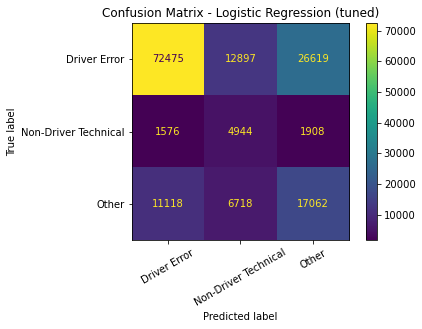

{'Model': 'Logistic Regression (tuned)',
 'Accuracy': 0.6083107451212681,
 'Macro_F1': 0.4863044101825939}

In [38]:
logreg_pipe_tuned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        solver="saga",
        penalty="l2",
        C=0.5,
        multi_class="multinomial",
        max_iter=2000,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42
    ))
])

evaluate("Logistic Regression (tuned)", logreg_pipe_tuned)

- **Accuracy:** 0.6083  
- **Macro F1:** 0.4863  
- **Evaluation:** The tuned version of Logistic Regression adjusts the regularization parameter (C) to balance bias and variance. While it showed minimal improvement, it still falls short of addressing the complex, non-linear relationships in the data.


### 5.5.2 Decision Tree

### *Baseline Decision Tree*

DECISION TREE
Goal: Capture non-linear relationships and interactions between features while remaining explainable.


Decision Tree
Accuracy: 0.7476
Macro F1 : 0.4436

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.77      0.97      0.86    111991
Non-Driver Technical       0.53      0.11      0.18      8428
               Other       0.56      0.20      0.29     34898

            accuracy                           0.75    155317
           macro avg       0.62      0.43      0.44    155317
        weighted avg       0.71      0.75      0.69    155317



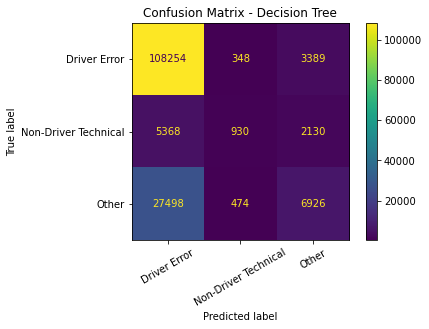

In [39]:
# Evaluate decision tree model and store results
result_tree = evaluate("Decision Tree", tree_pipe)
results.append(result_tree)

- **Accuracy:** 0.7476  
- **Macro F1:** 0.4436  
- **Evaluation:** Decision Tree introduces non-linearity but suffers from overfitting, as evidenced by high accuracy but low macro F1. It overemphasizes the majority class (Driver Error), neglecting the minority classes.


### *Decision Tree – Pruned and Class-Balanced*


Decision Tree (pruned & balanced)
Accuracy: 0.6144
Macro F1 : 0.4859

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.66      0.75    111991
Non-Driver Technical       0.19      0.61      0.29      8428
               Other       0.39      0.46      0.42     34898

            accuracy                           0.61    155317
           macro avg       0.48      0.58      0.49    155317
        weighted avg       0.71      0.61      0.65    155317



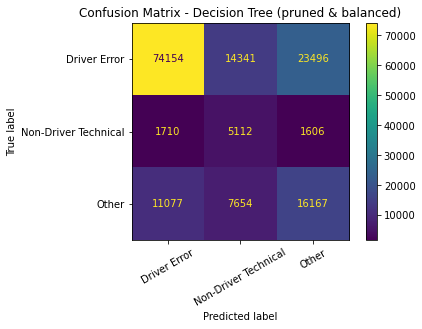

{'Model': 'Decision Tree (pruned & balanced)',
 'Accuracy': 0.6144401449937869,
 'Macro_F1': 0.48591732404484933}

In [ ]:
tree_pipe_pruned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=14,              
        min_samples_leaf=300,      
        min_samples_split=1000,    
        class_weight="balanced",   
        random_state=42
    ))
])

evaluate("Decision Tree (pruned & balanced)", tree_pipe_pruned)

- **Accuracy:** 0.6144  
- **Macro F1:** 0.4859  
- **Justification:** Pruning and balancing via `class_weight="balanced"` improved the model’s generalizability. However, it still struggles with capturing minority classes effectively, indicating room for improvement in balancing performance across all classes.


## 5.6 Black-Box Models

### 5.6.1 Random Forest
### *Baseline Model*

RANDOM FOREST
The Goal: Fix the "instability" of the single Decision Tree by using the "Wisdom of the Crowd."


Random Forest
Accuracy: 0.6332
Macro F1 : 0.5011

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.68      0.76    111991
Non-Driver Technical       0.21      0.58      0.31      8428
               Other       0.40      0.48      0.44     34898

            accuracy                           0.63    155317
           macro avg       0.49      0.58      0.50    155317
        weighted avg       0.71      0.63      0.66    155317



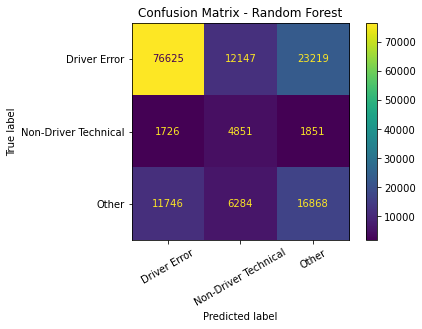

In [48]:
# Evaluate random forest model and store results
result_rf = evaluate("Random Forest", rf_pipe)
results.append(result_rf)

- **Accuracy:** 0.6332  
- **Macro F1:** 0.5011  
- **Evaluation:** Random Forest, utilizing an ensemble of trees, improves model stability and handles non-linearity better than Decision Trees. However, the class imbalance still affects the model’s ability to predict minority causes well.


### *Tunned Random Forest*


Random Forest (tuned)
Accuracy: 0.6120
Macro F1 : 0.4868

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.66      0.74    111991
Non-Driver Technical       0.19      0.60      0.29      8428
               Other       0.39      0.48      0.43     34898

            accuracy                           0.61    155317
           macro avg       0.48      0.58      0.49    155317
        weighted avg       0.71      0.61      0.65    155317



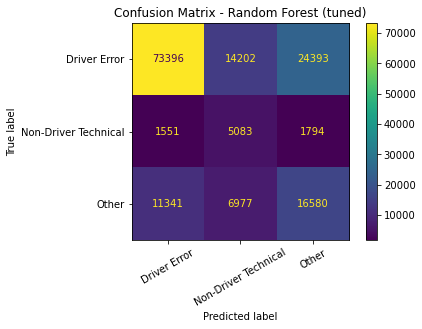

{'Model': 'Random Forest (tuned)',
 'Accuracy': 0.6120321664724402,
 'Macro_F1': 0.4867817497539848}

In [49]:
rf_pipe_tuned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,              
        max_depth=10,                  
        min_samples_leaf=100,          
        max_features=0.3,              
        bootstrap=True,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

evaluate("Random Forest (tuned)", rf_pipe_tuned)

- **Accuracy:** 0.6120  
- **Macro F1:** 0.4868  
- **Evaluation:** Despite tuning parameters like `n_estimators` and `max_depth`, the tuned Random Forest does not outperform its baseline in terms of macro F1 score. The focus was to refine model stability without introducing overfitting.


### 5.6.2 XGBoost
### *Baseline Model*

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBoost
Accuracy: 0.7609
Macro F1 : 0.5066

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.79      0.95      0.86    111991
Non-Driver Technical       0.55      0.18      0.28      8428
               Other       0.60      0.28      0.38     34898

            accuracy                           0.76    155317
           macro avg       0.64      0.47      0.51    155317
        weighted avg       0.73      0.76      0.72    155317



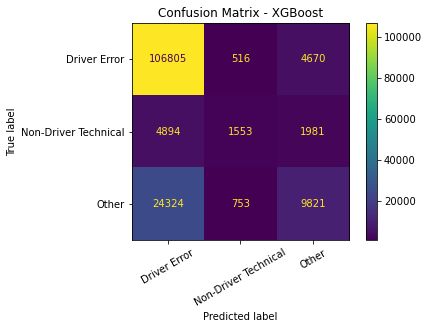

In [51]:
from xgboost import XGBClassifier


xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        random_state=42
    ))
])

result_xgb = evaluate("XGBoost", xgb_pipe)
results.append(result_xgb)

- **Accuracy:** 0.7609  
- **Macro F1:** 0.5066  
- **Evaluation:** XGBoost improves both accuracy and macro F1 score by focusing on residual errors from previous trees. However, despite the improvement, there's a noticeable trade-off between accuracy and the ability to interpret complex decision boundaries.


## Final Model Selection: XGBoost
- **Best Model:** XGBoost
- **Accuracy:** 0.7609  
- **Macro F1:** 0.5066  
- **Justification:** XGBoost provides the best trade-off between predictive accuracy and class balance, achieving the highest macro F1 score. Although it’s a black-box model, it offers a significant improvement over white-box models, justifying its selection. Further post-hoc interpretability techniques can be applied to understand key factors influencing predictions.


## Model Interpretability